=== LOADING ORIGINAL DATASETS ===


/tmp/ipykernel_252605/305458960.py:9: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_attack_original = pd.read_csv("SWaT_Dataset_Attack_v0.csv", header=0)


Normal dataset shape: (495000, 53)
Attack dataset shape: (449919, 53)

=== COLUMN NAMES BEFORE CLEANING ===
Normal data first 5 columns: ['   Timestamp ', 'FIT101', 'LIT101', 'MV101', 'P101']
Attack data first 5 columns: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

=== LOADING PROCESSED DATASETS ===
Processed train dataset shape: (495000, 53)
Processed test dataset shape: (449919, 53)

=== COLUMN NAMES AFTER CLEANING ===
Processed train data first 5 columns: ['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101']
Processed test data first 5 columns: ['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101']

=== ATTACK LABELING ===
Total attack data points: 51590.0 (11.47% of test data)


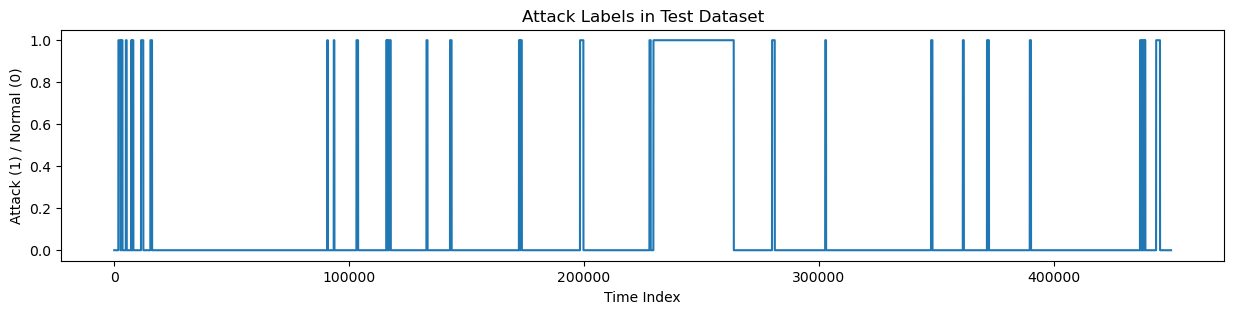


=== DATA TYPES ===
Original normal data types (first 5 columns):
   Timestamp      object
FIT101           float64
LIT101           float64
MV101              int64
P101               int64
dtype: object

Processed train data types (first 5 columns):
Timestamp     object
FIT101       float64
LIT101       float64
MV101          int64
P101           int64
dtype: object

=== SAMPLE DATA ===
Original normal data (first 3 rows):
                    Timestamp   FIT101    LIT101  MV101  P101
0     22/12/2015  4:30:00  PM      0.0  124.3135      1     1
1     22/12/2015  4:30:01  PM      0.0  124.3920      1     1
2     22/12/2015  4:30:02  PM      0.0  124.4705      1     1

Processed train data (first 3 rows):
                     Timestamp  FIT101    LIT101  MV101  P101
0     22/12/2015  4:30:00  PM      0.0  124.3135      1     1
1     22/12/2015  4:30:01  PM      0.0  124.3920      1     1
2     22/12/2015  4:30:02  PM      0.0  124.4705      1     1

=== STATISTICS FOR COLUMN: LIT101 ==

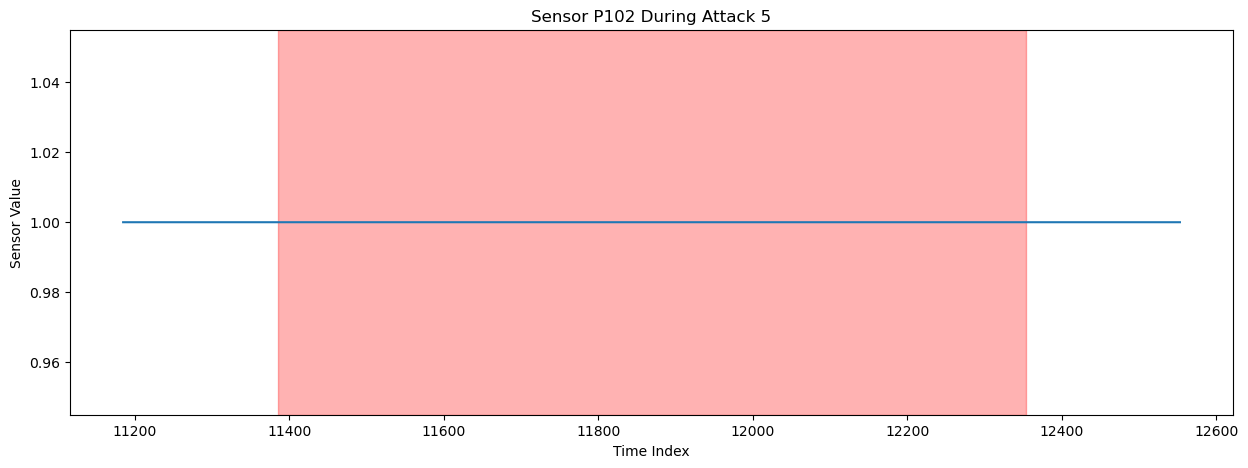

Attack duration: 970 time steps


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load original datasets
print("=== LOADING ORIGINAL DATASETS ===")
df_normal_original = pd.read_csv("SWaT_Dataset_Normal_v1.csv", header=1)  # Using header=1 as the script does
df_attack_original = pd.read_csv("SWaT_Dataset_Attack_v0.csv", header=0)
df_attack_original = df_attack_original.iloc[1:]  # Skip the first row as the script does

print(f"Normal dataset shape: {df_normal_original.shape}")
print(f"Attack dataset shape: {df_attack_original.shape}")

# 2. Check column names before cleaning
print("\n=== COLUMN NAMES BEFORE CLEANING ===")
print("Normal data first 5 columns:", df_normal_original.columns.tolist()[:5])
print("Attack data first 5 columns:", df_attack_original.columns.tolist()[:5])

# 3. Load processed datasets
print("\n=== LOADING PROCESSED DATASETS ===")
df_train = pd.read_csv("SWATv0_train.csv")
df_test = pd.read_csv("SWATv0_test.csv")

print(f"Processed train dataset shape: {df_train.shape}")
print(f"Processed test dataset shape: {df_test.shape}")

# 4. Compare column names
print("\n=== COLUMN NAMES AFTER CLEANING ===")
print("Processed train data first 5 columns:", df_train.columns.tolist()[:5])
print("Processed test data first 5 columns:", df_test.columns.tolist()[:5])

# 5. Check attack labeling
print("\n=== ATTACK LABELING ===")
attack_count = df_test['Normal/Attack'].sum()
print(f"Total attack data points: {attack_count} ({attack_count/len(df_test)*100:.2f}% of test data)")

plt.figure(figsize=(15, 3))
plt.plot(df_test['Normal/Attack'].values)
plt.title('Attack Labels in Test Dataset')
plt.xlabel('Time Index')
plt.ylabel('Attack (1) / Normal (0)')
plt.show()

# 6. Check data type conversions
print("\n=== DATA TYPES ===")
print("Original normal data types (first 5 columns):")
print(df_normal_original.dtypes[:5])
print("\nProcessed train data types (first 5 columns):")
print(df_train.dtypes[:5])

# 7. Sample a few rows to see the data
print("\n=== SAMPLE DATA ===")
print("Original normal data (first 3 rows):")
print(df_normal_original.iloc[:3, :5])
print("\nProcessed train data (first 3 rows):")
print(df_train.iloc[:3, :5])

# 8. Basic statistics for a sample column
column = df_train.columns[2]  # Just pick a sensor column
print(f"\n=== STATISTICS FOR COLUMN: {column} ===")
print("Original normal data:")
print(df_normal_original[column].describe())
print("\nProcessed train data:")
print(df_train[column].describe())

# 9. Check for any NaN values in processed data
print("\n=== NaN VALUES CHECK ===")
print(f"NaN values in processed train data: {df_train.isna().sum().sum()}")
print(f"NaN values in processed test data: {df_test.isna().sum().sum()}")

# 10. Check a specific attack period
attack_index = 5  # Choose an attack to examine
attack_start = np.where(np.diff(np.hstack(([0], df_test['Normal/Attack'].values))) == 1)[0]
attack_end = np.where(np.diff(np.hstack((df_test['Normal/Attack'].values, [0]))) == -1)[0]

if attack_index < len(attack_start):
    start_idx = attack_start[attack_index]
    end_idx = attack_end[attack_index]
    print(f"\n=== EXAMINING ATTACK {attack_index} (Indices {start_idx} to {end_idx}) ===")
    
    # Plot a relevant sensor during the attack
    plt.figure(figsize=(15, 5))
    # Use a buffer before and after the attack period
    buffer = 200
    plot_start = max(0, start_idx - buffer)
    plot_end = min(len(df_test), end_idx + buffer)
    
    # Find a column that changes during the attack (just a demonstration)
    sample_column = df_test.columns[5]  # Arbitrary sensor column
    plt.plot(range(plot_start, plot_end), df_test[sample_column].iloc[plot_start:plot_end])
    
    # Highlight the attack period
    plt.axvspan(start_idx, end_idx, alpha=0.3, color='red')
    plt.title(f'Sensor {sample_column} During Attack {attack_index}')
    plt.xlabel('Time Index')
    plt.ylabel('Sensor Value')
    plt.show()
    
    print(f"Attack duration: {end_idx - start_idx + 1} time steps")